<a href="https://colab.research.google.com/github/Akkki28/SparseMax-Transformers/blob/main/softmax_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import math
import seaborn as sns
import torch.nn.functional as F

In [2]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    attn_logits = torch.matmul(q, k.transpose(-2, -1))
    attn_logits = attn_logits / math.sqrt(d_k)
    if mask is not None:
        attn_logits = attn_logits.masked_fill(mask == 0, -9e15)
    attention = F.softmax(attn_logits, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [3]:
seq_len, d_k = 3, 2
q = torch.rand(seq_len,d_k)
k = torch.rand(seq_len, d_k)
v = torch.rand(seq_len, d_k)

values, attention = scaled_dot_product(q, k, v)

In [4]:
def plot_attention_maps(attention, title='Attention Map'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention.detach().numpy(), annot=True, cmap='viridis', xticklabels=[f"Token {i}" for i in range(seq_len)], yticklabels=[f"Token {i}" for i in range(seq_len)])
    plt.xlabel("Key")
    plt.ylabel("Query")
    plt.title(title)
    plt.show()

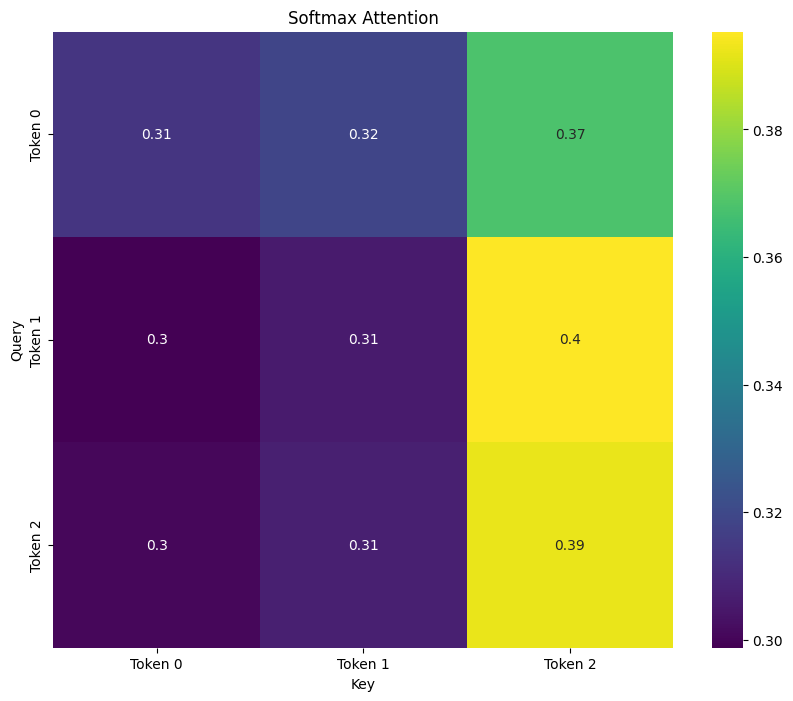

In [5]:
plot_attention_maps(attention, title='Softmax Attention')